In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import sys
import re

In [2]:
df = pd.read_csv('../data/scraped_weather_2010_2025.csv',index_col=0)

In [3]:
df.head()

,Date,Temperature,Dew Point,Wind Direction,Wind Speed,Gust,Pressure,Condition
0,20100101,[10. 10. 10. 10. ...,[6.11111111 6.11111111 7.22222222 7.22222222 7...,[240 270 250 250 250 250 250 250 270 270 250 2...,[7 6 7 7 7 9 9 9 9 9 9 9 9 9 9 9 9 9 5 3 3 6 5 5],[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[27.45 27.45 27.45 27.45 27.45 27.43 27.48 27....,['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Partly Cl...
1,20100102,[10. 10. 10. 11.111111...,[ 7.22222222 7.22222222 6.11111111 7.222222...,[200 210 210 200 210 230 210 210 230 230 0 2...,[6 6 3 5 6 3 5 5 5 3 0 7 9 9 9 5 5 5 5 5 5],[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[27.48 27.48 27.48 27.45 27.45 27.45 27.45 27....,['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fa...
2,20100103,[12.77777778 12.77777778 12.22222222 12.777777...,[1.11111111 1.11111111 2.22222222 2.77777778 2...,[210 220 0 0 0 200 200 230 250 250 250 2...,[ 5 5 0 0 0 5 5 6 5 9 9 9 8 14 9 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[27.4 27.4 27.37 27.37 27.37 27.37 27.37 27....,['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fa...
3,20100104,[10. 10. 10. 10. ...,[7.22222222 7.22222222 7.22222222 7.77777778 7...,[220 210 210 210 220 240 250 250 260 260 270 2...,[ 9 5 3 3 5 5 8 8 9 16 13 15 15 16 16 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[27.43 27.43 27.45 27.43 27.45 27.45 27.43 27....,['Partly Cloudy' 'Partly Cloudy' 'Partly Cloud...
4,20100105,[10. 10. 10. 10. ...,[7.77777778 7.77777778 7.77777778 7.22222222 7...,[250 250 210 230 240 240 240 240 240 240 250 3...,[ 5 5 7 10 7 5 5 7 5 6 5 3 6 5 5 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[27.48 27.48 27.48 27.48 27.48 27.48 27.51 27....,['Mostly Cloudy' 'Mostly Cloudy' 'Partly Cloud...


In [5]:
s = df.loc[23]['Condition'][1:-1]

In [6]:
p = re.findall(string=s, pattern=r"(?<=')\w+\s?\w*(?=')")

In [7]:
print(p)

['Fair', 'Partly Cloudy', 'Partly Cloudy', 'Partly Cloudy', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Partly Cloudy', 'Fair', 'Partly Cloudy', 'Partly Cloudy', 'Mostly Cloudy']


In [8]:
def get_datetime_data(index):
    date_string = df.loc[index]['Date']
    hourly_temp = df.loc[index]['Temperature'][1:-1].split()
    condition_string = df.loc[index]['Condition'][1:-1]
    hourly_condition = re.findall(string=condition_string, pattern=r"(?<=')\w+\s?\w*(?=')")
    hourly_wind_dir = df.loc[index]['Wind Direction'][1:-1].split()
    hourly_wind_spd = df.loc[index]['Wind Speed'][1:-1].split()

    MIN_READINGS = 20
    DAY_HOURS = 24
    num_readings = len(hourly_temp)
    
    if num_readings > DAY_HOURS:
        hourly_temp = hourly_temp[:DAY_HOURS]
        hourly_condition = hourly_condition[:DAY_HOURS]
        hourly_wind_dir = hourly_wind_dir[:DAY_HOURS]
        hourly_wind_spd = hourly_wind_spd[:DAY_HOURS]

    # print(num_readings)
    if num_readings < MIN_READINGS:
       return None

    if num_readings < DAY_HOURS:
        for _ in range(num_readings, DAY_HOURS):
            hourly_temp.append(hourly_temp[-1])
            hourly_wind_dir.append(hourly_wind_dir[-1])
            hourly_wind_spd.append(hourly_wind_spd[-1])

    num_condition = len(hourly_condition)
    if num_condition < DAY_HOURS:
        for _ in range(num_condition,DAY_HOURS):
            hourly_condition.append(hourly_condition[-1])


    
    
    dt_list = []
    for hour in range(len(hourly_temp)):
        dt = datetime.strptime(f'{date_string} {hour}', '%Y%m%d %H')
        dt_list.append(dt) 

    hourly_temp_np = np.array(hourly_temp, np.float32)
    hourly_wind_dir_np = np.array(hourly_wind_dir, np.float32)
    hourly_wind_spd_np = np.array(hourly_wind_spd, np.float32)


    list_of_days = []
    for hour in range(DAY_HOURS):
        
        dic = {
            'Datetime' : dt_list[hour],
            'Temperature' : hourly_temp_np[hour],
            'Condition' : hourly_condition[hour],
            'Wind Direction' : hourly_wind_dir_np[hour],
            'Wind Speed' : hourly_wind_spd_np[hour],
        }
        list_of_days.append(dic)

    return list_of_days

In [9]:
df.loc[18]['Condition']

"['Mostly Cloudy' 'Mostly Cloudy' 'Mostly Cloudy' 'Mostly Cloudy'\n 'Mostly Cloudy' 'Fair' 'Fair' 'Partly Cloudy' 'Partly Cloudy'\n 'Partly Cloudy' 'Partly Cloudy' 'Partly Cloudy' 'Partly Cloudy'\n 'Mostly Cloudy / Windy' 'Mostly Cloudy' 'Mostly Cloudy' 'Partly Cloudy'\n 'Mostly Cloudy' 'Partly Cloudy' 'Partly Cloudy' 'Partly Cloudy'\n 'Partly Cloudy' 'Partly Cloudy' 'Partly Cloudy']"

In [10]:
d = get_datetime_data(18)

In [11]:
data_datetime = []

for day in range(len(df)):
    try:
        data = get_datetime_data(day)
        data_datetime.append(data)
    except Exception as e:
        print(day)
        print(e)

In [12]:
data_datetime = [i for i in data_datetime if i]

In [13]:
data_datetime_seq = [i for sub in data_datetime for i in sub if sub]

In [15]:
sys.getsizeof(data_datetime_seq)

1140568

In [33]:
df2 = pd.DataFrame(data_datetime_seq)

In [34]:
df2.head()

,Datetime,Temperature,Condition,Wind Direction,Wind Speed
0,2010-01-01 00:00:00,10.000000,Fair,240.0,7.0
1,2010-01-01 01:00:00,10.000000,Fair,270.0,6.0
2,2010-01-01 02:00:00,10.000000,Fair,250.0,7.0
3,2010-01-01 03:00:00,10.000000,Fair,250.0,7.0
4,2010-01-01 04:00:00,11.111111,Fair,250.0,7.0


In [35]:
df2 = pd.get_dummies(df2, columns=['Condition'], drop_first=True)

In [36]:
df2

,Datetime,Temperature,Wind Direction,Wind Speed,Condition_Blowing Sand,Condition_Cloudy,Condition_Drizzle,Condition_Duststorm,Condition_Fair,Condition_Fog,...,Condition_Sandstorm,Condition_Sleet,Condition_Small Hail,Condition_Smoke,Condition_Snow,Condition_Snow Grains,Condition_Squalls,Condition_Thunder,Condition_Widespread Dust,Condition_Wintry Mix
0,2010-01-01 00:00:00,10.000000,240.0,7.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2010-01-01 01:00:00,10.000000,270.0,6.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2010-01-01 02:00:00,10.000000,250.0,7.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2010-01-01 03:00:00,10.000000,250.0,7.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2010-01-01 04:00:00,11.111111,250.0,7.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139027,2025-12-26 19:00:00,11.111111,340.0,2.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
139028,2025-12-26 20:00:00,11.111111,290.0,7.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
139029,2025-12-26 21:00:00,11.111111,260.0,7.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
139030,2025-12-26 22:00:00,11.111111,220.0,3.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df2['WindDir_sin'] = np.sin(np.deg2rad(df2['Wind Direction']))
df2['WindDir_cos'] = np.cos(np.deg2rad(df2['Wind Direction']))
df2.drop(columns=['Wind Direction'],inplace=True)

In [38]:
threshold = -15

for i in range(1,len(df2)):
    if df2.loc[i, 'Temperature'] < threshold:
        df2.loc[i, 'Temperature'] = (df2.loc[i - 1, 'Temperature'] + df2.loc[i + 1, 'Temperature']) / 2 

In [39]:
day_hours = 24
avg_month_len = 30

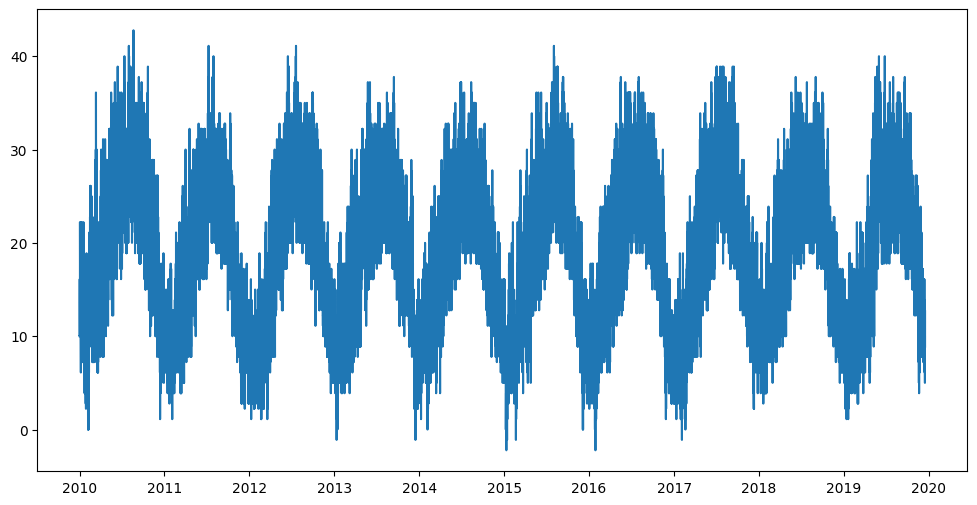

In [40]:
months = 12
years = 10

slice_date = day_hours * avg_month_len * months * years

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df2['Datetime'][:slice_date], df2['Temperature'][:slice_date])
plt.show()

In [41]:
s = df2['Temperature'].sort_values(ascending=True).unique()

In [42]:
s[1]

np.float32(-1.1111112)

In [43]:
df2['Temperature'] = df2['Temperature'].clip(lower=np.float32(-2.2222223))

In [44]:
upper_limit = df2['Wind Speed'].quantile(0.75)
df2['Wind Speed'] = df2['Wind Speed'].clip(upper=upper_limit)
print(f"Wind Speed clipped at 99.9th percentile: {upper_limit:.2f}")

Wind Speed clipped at 99.9th percentile: 9.00


{'whiskers': [<matplotlib.lines.Line2D at 0x793748d099d0>,
 'caps': [<matplotlib.lines.Line2D at 0x793748d09f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x793748d096d0>],
 'medians': [<matplotlib.lines.Line2D at 0x793748d086e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x793748d0a660>],
 'means': []}

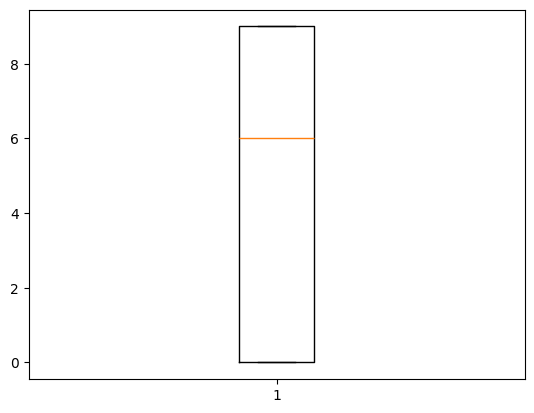

In [46]:
plt.boxplot(df2['Wind Speed'])

(array([  766.,  6254., 25069., 19799., 25085., 23566., 23815., 11025.,
         3345.,   308.]),
 array([-2.22222233,  2.27777767,  6.77777767, 11.27777767, 15.77777767,
        20.27777863, 24.77777863, 29.27777863, 33.77777863, 38.27777863,
        42.77777863]),
 <BarContainer object of 10 artists>)

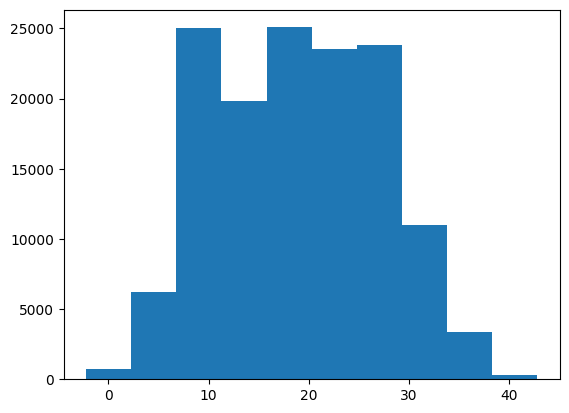

In [47]:
plt.hist(df2['Temperature'])

In [48]:
t_test = df.loc[4784]['Temperature'][1:-1].strip().replace('\n','').split()

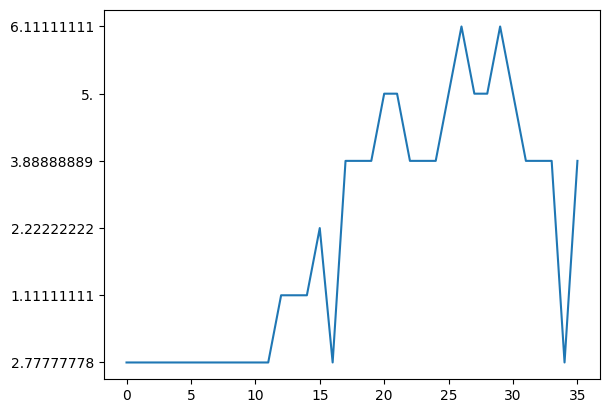

In [49]:
plt.plot(range(len(t_test)), t_test)

In [50]:
lengths = []
for day in range(len(df)):
    l = len(df.loc[day]['Temperature'][1:-1].strip().replace('\n','').split())
    lengths.append(l)

In [51]:
outliers = [i for i in lengths if i != 24]

(array([  4.,   2.,   2.,   0.,   1.,   1.,   3.,   1.,   1.,   4.,   1.,
          0.,   1.,   2.,   1.,   4.,   9.,   8.,  29.,  83., 264., 952.,
          0.,   0., 576., 175.,  67.,  24.,  13.,   1.,   3.,   1.,   0.,
          0.,   4.,   1.]),
 array([ 3.        ,  3.91666667,  4.83333333,  5.75      ,  6.66666667,
         7.58333333,  8.5       ,  9.41666667, 10.33333333, 11.25      ,
        12.16666667, 13.08333333, 14.        , 14.91666667, 15.83333333,
        16.75      , 17.66666667, 18.58333333, 19.5       , 20.41666667,
        21.33333333, 22.25      , 23.16666667, 24.08333333, 25.        ,
        25.91666667, 26.83333333, 27.75      , 28.66666667, 29.58333333,
        30.5       , 31.41666667, 32.33333333, 33.25      , 34.16666667,
        35.08333333, 36.        ]),
 <BarContainer object of 36 artists>)

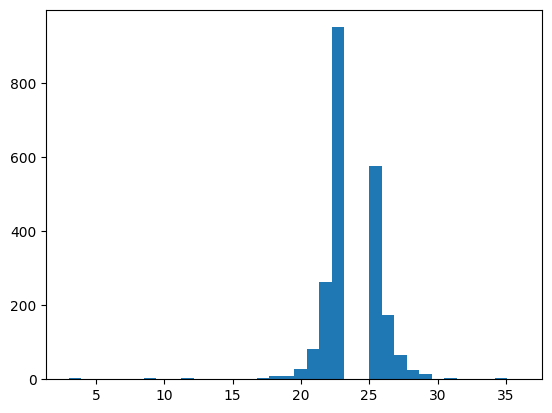

In [52]:
plt.hist(outliers,bins= 36)

(array([  13.,   11.,  397., 5407.,   10.]),
 array([ 3. ,  9.6, 16.2, 22.8, 29.4, 36. ]),
 <BarContainer object of 5 artists>)

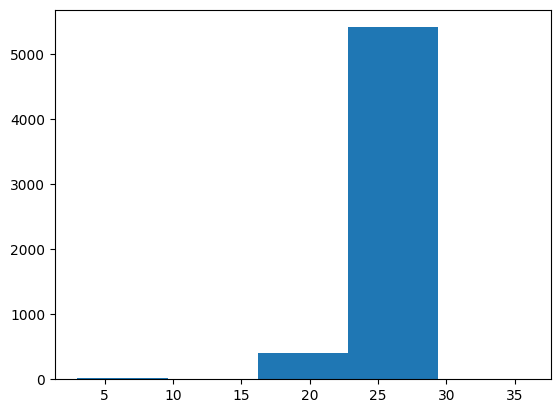

In [43]:
plt.hist(lengths,bins=5)

In [55]:
df2.to_csv('../data/preprocessed_data_2010_2025.csv',index=0)